# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Optimal number of topics (K): 2


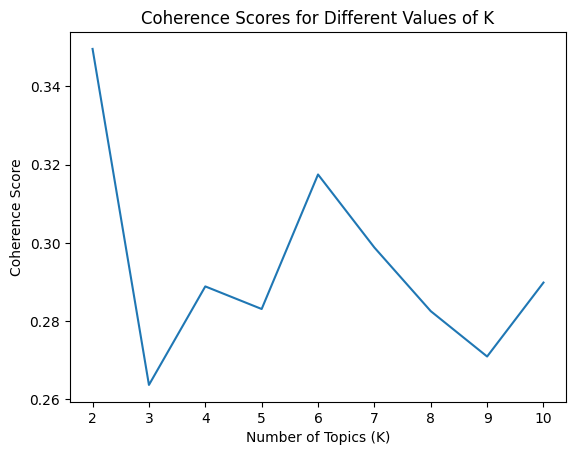


Topics and their top words:
Topic 0: 0.064*"." + 0.044*"ago" + 0.043*"3" + 0.043*"working" + 0.043*"wifi" + 0.043*"still" + 0.042*"rebooting" + 0.042*"connection" + 0.042*"internet" + 0.042*"router"
Topic 1: 0.121*"." + 0.059*"website" + 0.036*"sign" + 0.036*"ca" + 0.036*"available" + 0.036*"login" + 0.036*"times" + 0.036*"fix" + 0.036*"n't" + 0.036*"new"

Topic Summaries:
Topic 0: 0 . 0 6 4 * " . "   +   0 . 0 4 4 * " a g o "   +   0 . 0 4 3 * " 3 "   +   0 . 0 4 3 * " w o r k i n g "   +   0 . 0 4 3 * " w i f i "   +   0 . 0 4 3 * " s t i l l "   +   0 . 0 4 2 * " r e b o o t i n g "   +   0 . 0 4 2 * " c o n n e c t i o n "   +   0 . 0 4 2 * " i n t e r n e t "   +   0 . 0 4 2 * " r o u t e r "
Topic 1: 0 . 1 2 1 * " . "   +   0 . 0 5 9 * " w e b s i t e "   +   0 . 0 3 6 * " s i g n "   +   0 . 0 3 6 * " c a "   +   0 . 0 3 6 * " a v a i l a b l e "   +   0 . 0 3 6 * " l o g i n "   +   0 . 0 3 6 * " t i m e s "   +   0 . 0 3 6 * " f i x "   +   0 . 0 3 6 * " n ' t "   +   0 . 0 3

In [1]:
# Write your code here
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
tickets = [
        "My internet connection stopped working 3 days ago. I have tried rebooting the router but still no wifi.",
        "I can't login to the website. It just times out when I try to sign in. Please fix this.",
        "When will the new iPhone be available for purchase on your website?"
    ]

# Preprocess the data (tokenization, stopword removal, etc.)
stop_words = set(stopwords.words('english'))
processed_texts = []
for text in tickets:
    tokens = word_tokenize(text.lower())
    processed_text = [word for word in tokens if word not in stop_words]
    processed_texts.append(processed_text)

# Create a dictionary from the processed texts
dictionary = corpora.Dictionary(processed_texts)

# Create the corpus
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Compute coherence scores for different values of K
coherence_scores = []
for k in range(2, 11):  # You can adjust the range based on your needs
    lda_model = gensim.models.LdaMulticore(corpus=corpus, num_topics=k, id2word=dictionary, random_state=100)
    coherence_model = gensim.models.CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Find the optimal number of topics based on the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
print(f"Optimal number of topics (K): {optimal_k}")

# Plot the coherence scores
x = range(2, 11)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Values of K")
plt.show()

# Train the LDA model with the optimal number of topics
lda_model = gensim.models.LdaMulticore(corpus=corpus, num_topics=optimal_k, id2word=dictionary, random_state=100)

# Print the topics and their top words
print("\nTopics and their top words:")
for idx, topic in lda_model.print_topics(-10):
    print(f"Topic {idx}: {topic}")

    # Print the topic summaries
print("\nTopic Summaries:")
for idx, topic in enumerate(lda_model.print_topics(-10, num_words=10)):
    # Extract the list of top words from the topic tuple
    top_words = [word for word in topic[1]]
    summary = ' '.join(top_words)
    print(f"Topic {idx}: {summary}")

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Optimal number of topics (K): 5


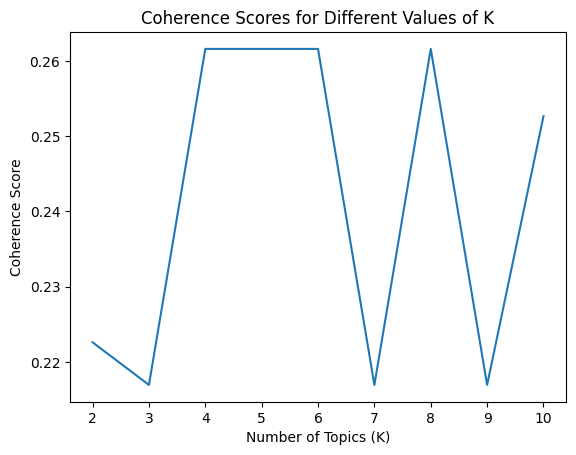


Topics and their top words:
Topic 0: 0.744*"." + 0.168*"website" + 0.159*"fix" + 0.159*"try" + 0.159*"times" + 0.159*"sign" + 0.159*"n't" + 0.159*"login" + 0.159*"ca" + 0.159*"please"
Topic 1: 0.230*"website" + -0.230*"3" + -0.230*"connection" + -0.230*"still" + -0.230*"wifi" + -0.230*"stopped" + -0.230*"tried" + -0.230*"router" + -0.230*"internet" + -0.230*"days"
Topic 2: 0.409*"purchase" + 0.409*"new" + 0.409*"?" + 0.409*"iphone" + 0.409*"available" + 0.361*"website" + -0.087*"." + -0.048*"login" + -0.048*"sign" + -0.048*"try"

Topic Summaries:
Topic 0: 0 . 7 4 4 * " . "   +   0 . 1 6 8 * " w e b s i t e "   +   0 . 1 5 9 * " f i x "   +   0 . 1 5 9 * " t r y "   +   0 . 1 5 9 * " t i m e s "   +   0 . 1 5 9 * " s i g n "   +   0 . 1 5 9 * " n ' t "   +   0 . 1 5 9 * " l o g i n "   +   0 . 1 5 9 * " c a "   +   0 . 1 5 9 * " p l e a s e "
Topic 1: 0 . 2 3 0 * " w e b s i t e "   +   - 0 . 2 3 0 * " 3 "   +   - 0 . 2 3 0 * " c o n n e c t i o n "   +   - 0 . 2 3 0 * " s t i l l "   

In [2]:
# Write your code here
import gensim
from gensim import corpora
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset (replace 'your_dataset.csv' with the path to your dataset)
tickets = [
        "My internet connection stopped working 3 days ago. I have tried rebooting the router but still no wifi.",
        "I can't login to the website. It just times out when I try to sign in. Please fix this.",
        "When will the new iPhone be available for purchase on your website?"
    ]

# Preprocess the data (tokenization, stopword removal, etc.)
stop_words = set(stopwords.words('english'))
processed_texts = []
for text in tickets:
    tokens = word_tokenize(text.lower())
    processed_text = [word for word in tokens if word not in stop_words]
    processed_texts.append(processed_text)

# Create a dictionary from the processed texts
dictionary = corpora.Dictionary(processed_texts)

# Create the corpus
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Compute coherence scores for different values of K
coherence_scores = []
for k in range(2, 11):  # You can adjust the range based on your needs
    lsa_model = gensim.models.LsiModel(corpus=corpus, num_topics=k, id2word=dictionary)
    coherence_model = gensim.models.CoherenceModel(model=lsa_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Find the optimal number of topics based on the highest coherence score
optimal_k = coherence_scores.index(max(coherence_scores)) + 2
print(f"Optimal number of topics (K): {optimal_k}")

# Plot the coherence scores
x = range(2, 11)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Values of K")
plt.show()

# Train the LSA model with the optimal number of topics
lsa_model = gensim.models.LsiModel(corpus=corpus, num_topics=optimal_k, id2word=dictionary)

# Print the topics and their top words
print("\nTopics and their top words:")
for idx, topic in lsa_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Print the topic summaries
print("\nTopic Summaries:")
for idx, topic in enumerate(lsa_model.print_topics(-1, num_words=10)):
    # Extract the list of top words from the topic tuple
    top_words = [word for word in topic[1]]
    summary = ' '.join(top_words)
    print(f"Topic {idx}: {summary}")



## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [ ]:
!pip install lda2vec
!pip install pyLDAvis



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 33.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import requests
from bs4 import BeautifulSoup
import gensim
from gensim import corpora
from gensim.models import Word2Vec, LdaModel
import numpy as np

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# URL of the webpage containing text data
url = "https://en.wikipedia.org/wiki/Short_story"

# Fetch the webpage content
response = requests.get(url)
html_content = response.text

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# Tokenization and preprocessing
stop_words = set(stopwords.words('english'))
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    return tokens

tokenized_data = [preprocess_text(text) for text in text_content.split()]

# Train word embeddings using Word2Vec
word2vec_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

# Convert tokenized data to bag-of-words representation
dictionary = corpora.Dictionary(tokenized_data)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_data]

# Train LDA on top of the embeddings
num_topics = 5
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

# Print topics
topics = lda_model.print_topics(num_topics=num_topics, num_words=10)
for topic_id, words in topics:
    print(f"Topic {topic_id + 1}: {words}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Topic 1: 0.021*"novel" + 0.020*"retrieved" + 0.016*"new" + 0.011*"action" + 0.011*"state" + 0.010*"using" + 0.010*"time" + 0.009*"device" + 0.009*"nobel" + 0.009*"study"
Topic 2: 0.172*"story" + 0.025*"genre" + 0.019*"literature" + 0.018*"style" + 0.017*"tale" + 0.015*"additional" + 0.012*"modern" + 0.012*"reference" + 0.010*"work" + 0.010*"moral"
Topic 3: 0.157*"short" + 0.045*"fiction" + 0.018*"theory" + 0.016*"plot" + 0.015*"literary" + 0.014*"unsourced" + 0.013*"term" + 0.011*"form" + 0.011*"list" + 0.010*"united"
Topic 4: 0.036*"narrative" + 0.020*"character" + 0.017*"press" + 0.014*"structure" + 0.012*"august" + 0.011*"ed" + 0.011*"york" + 0.009*"university" + 0.009*"science" + 0.008*"conflict"
Topic 5: 0.015*"identifiersarticles" + 0.011*"writer" + 0.010*"article" + 0.009*"narrator" + 0.007*"gothic" + 0.007*"related" + 0.007*"history" + 0.007*"link" + 0.007*"multiple" + 0.006*"award"


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [5]:
%%capture
!pip install bertopic

In [11]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import requests
from bs4 import BeautifulSoup
from bertopic import BERTopic

# Fetch the webpage content
url = "https://en.wikipedia.org/wiki/Short_story"
response = requests.get(url)
html_content = response.text

# Parse the HTML content to extract text
soup = BeautifulSoup(html_content, 'html.parser')
text_content = soup.get_text()

# Split the text into paragraphs
paragraphs = [p.strip() for p in text_content.split('\n') if p.strip()]

# Tokenize and preprocess each paragraph
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

documents = []
for paragraph in paragraphs:
    tokens = word_tokenize(paragraph.lower())
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    documents.append(' '.join(filtered_tokens))

# Initialize BERTopic model
topic_model = BERTopic()

# Fit BERTopic model on filtered text
topics, probs = topic_model.fit_transform(documents)

# Get the most frequent topic
most_frequent_topic = topic_model.get_topic(0)
print("Most Frequent Topic:", most_frequent_topic)

# Visualize topics
topic_model.visualize_topics()



Most Frequent Topic: [('short', 0.047839696812515806), ('story', 0.041948675890436174), ('stories', 0.0337100873456151), ('form', 0.017897179904477065), ('writers', 0.016654576221224775), ('tales', 0.015610242550122716), ('modern', 0.01549545267383917), ('century', 0.015136614531665375), ('needed', 0.014748119230566542), ('citation', 0.0143886346257078)]


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [ ]:
# Write your code here
'''
   LDA is the dominant topic modeling technique due to its outstanding interpretability and coherence.
   LDA creates topics from word distributions, providing clear and intelligible insights into the underlying themes in textual data.
   This interpretability is essential in a variety of applications, including academic research and content analysis, where human understanding of issues is critical.
   Furthermore, LDA routinely produces high coherence ratings, which indicate that the themes it creates are logically connected and semantically coherent.
   This coherence ensures that the subjects are relevant and internally consistent, which increases the utility of LDA for extracting actionable insights from text corpora.

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):


'''The learning experience of working with text data and extracting features using various topic modeling algorithms like LDA, LSA, BERTopic, and LDA2Vec was highly enriching.
The implementations helped grasp the nuances of tokenization, preprocessing, and modeling latent topics from text.
Understanding the underlying algorithms was challenging but rewarding, developing a deeper comprehension of extracting meaningful information.
A significant challenge encountered was tokenizing words from website URLs, handling HTML tags, and extracting relevant content.
Initially, algorithms tokenized link text instead of website content, requiring exploration of tools like BeautifulSoup and preprocessing techniques.
Some algorithms like LDA2Vec were computationally intensive for larger datasets, necessitating code optimization.
This exercise is highly relevant to Natural Language Processing (NLP), as topic modeling and feature extraction are fundamental tasks enabling sentiment analysis, document classification, information retrieval, and more.
Mastering these techniques is crucial for pursuing effective NLP research and developing robust applications in various domains.
'''

